# Data Exploration and Splitting

##### 1. IMPORTS AND SETUP

In [ ]:
import shutil
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

##### 2. DATA EXPLORATION

In [2]:
print("="*70)
print("PUZZLE DATASET EXPLORATION")
print("="*70)

# Define paths (navigate up from notebooks directory)
images_dir = Path("../data/images")
masks_dir = Path("../data/masks")

# Get all images and masks
all_images = sorted(list(images_dir.glob("*.jpg")))
all_masks = sorted(list(masks_dir.glob("*.png")))

print(f"\nTotal images found: {len(all_images)}")
print(f"Total masks found: {len(all_masks)}")

# Identify labeled vs unlabeled data
labeled_images = []
unlabeled_images = []

for img_path in all_images:
    # Check if corresponding mask exists
    mask_name = img_path.stem + "_mask.png"
    mask_path = masks_dir / mask_name
    
    if mask_path.exists():
        labeled_images.append(img_path)
    else:
        unlabeled_images.append(img_path)

print(f"\n✓ Labeled images (with masks): {len(labeled_images)}")
print(f"✓ Unlabeled images (no masks): {len(unlabeled_images)}")

PUZZLE DATASET EXPLORATION

Total images found: 1000
Total masks found: 500

✓ Labeled images (with masks): 500
✓ Unlabeled images (no masks): 500


##### 3. SAMPLE VISUALIZATION


SAMPLE VISUALIZATION


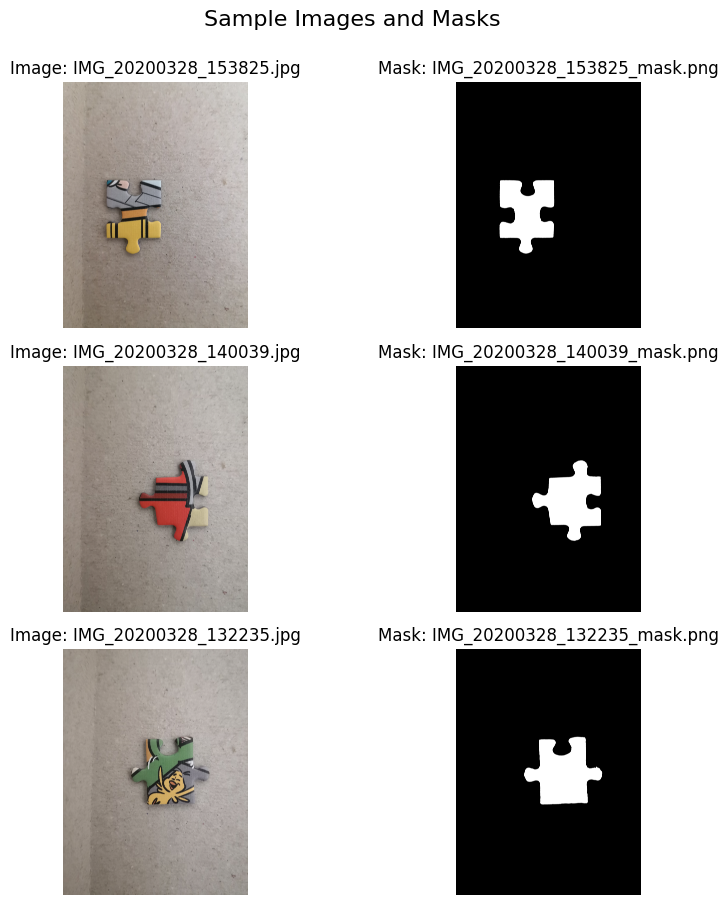

In [3]:
print("\n" + "="*70)
print("SAMPLE VISUALIZATION")
print("="*70)

# Display a few random samples
n_samples = 3
sample_indices = random.sample(range(len(labeled_images)), n_samples)

fig, axes = plt.subplots(n_samples, 2, figsize=(10, 3*n_samples))
fig.suptitle('Sample Images and Masks', fontsize=16, y=1.00)

for idx, sample_idx in enumerate(sample_indices):
    img_path = labeled_images[sample_idx]
    mask_path = masks_dir / (img_path.stem + "_mask.png")
    
    # Load image and mask
    img = Image.open(img_path)
    mask = Image.open(mask_path)
    
    # Display
    axes[idx, 0].imshow(img)
    axes[idx, 0].set_title(f'Image: {img_path.name}')
    axes[idx, 0].axis('off')
    
    axes[idx, 1].imshow(mask, cmap='gray')
    axes[idx, 1].set_title(f'Mask: {mask_path.name}')
    axes[idx, 1].axis('off')

plt.tight_layout()
plt.show()

##### 4. IMAGE AND MASK ANALYSIS

In [4]:
print("\n" + "="*70)
print("IMAGE AND MASK ANALYSIS")
print("="*70)

# Analyze image dimensions
print("\nAnalyzing image/mask dimensions...")
image_sizes = []
mask_sizes = []

for img_path in labeled_images[:100]:
    img = Image.open(img_path)
    image_sizes.append(img.size)
    
    mask_path = masks_dir / (img_path.stem + "_mask.png")
    mask = Image.open(mask_path)
    mask_sizes.append(mask.size)

image_sizes = np.array(image_sizes)
mask_sizes = np.array(mask_sizes)

# Check if all images have same dimensions
unique_image_sizes = np.unique(image_sizes, axis=0)
print(f"\nUnique image sizes: {len(unique_image_sizes)}")
if len(unique_image_sizes) == 1:
    print(f"✓ All images have the same size: {unique_image_sizes[0]}")
else:
    print(f"⚠ Images have varying sizes")

# Check if all masks have same dimensions
unique_mask_sizes = np.unique(mask_sizes, axis=0)
print(f"\nUnique image sizes: {len(unique_mask_sizes)}")
if len(unique_mask_sizes) == 1:
    print(f"✓ All masks have the same size: {unique_mask_sizes[0]}")
else:
    print(f"⚠ Masks have varying sizes")


IMAGE AND MASK ANALYSIS

Analyzing image/mask dimensions...

Unique image sizes: 1
✓ All images have the same size: [3840 5120]

Unique image sizes: 1
✓ All masks have the same size: [3840 5120]


##### 5. DATA SPLITTING

In [5]:
print("\n" + "="*70)
print("DATA SPLITTING")
print("="*70)

# Shuffle labeled data
labeled_images_shuffled = labeled_images.copy()
random.shuffle(labeled_images_shuffled)

# Calculate split sizes
n_labeled = len(labeled_images_shuffled)
n_train = int(0.70 * n_labeled)  # 70%
n_val = int(0.15 * n_labeled)    # 15%
n_test = n_labeled - n_train - n_val  # 15%

print(f"\nSplit from {n_labeled} labeled images:")
print(f"  Training:   {n_train} images ({n_train/n_labeled*100:.1f}%)")
print(f"  Validation: {n_val} images ({n_val/n_labeled*100:.1f}%)")
print(f"  Test:       {n_test} images ({n_test/n_labeled*100:.1f}%)")
print(f"\nUnlabeled (for final submission): {len(unlabeled_images)} images")

# Split the data
train_images = labeled_images_shuffled[:n_train]
val_images = labeled_images_shuffled[n_train:n_train+n_val]
test_images = labeled_images_shuffled[n_train+n_val:]

# Create split directories
split_dirs = {
    'train': ('../data/train/images', '../data/train/masks'),
    'val': ('../data/val/images', '../data/val/masks'),
    'test': ('../data/test/images', '../data/test/masks'),
}

# Create directories
for split_name, (img_dir, mask_dir) in split_dirs.items():
    Path(img_dir).mkdir(parents=True, exist_ok=True)
    Path(mask_dir).mkdir(parents=True, exist_ok=True)

print("\n✓ Created split directories")

# Copy files to respective splits
print("\nCopying files to split directories...")

def copy_split(image_list, img_dest, mask_dest, split_name):
    """Copy images and masks to destination directories."""
    for img_path in image_list:
        # Copy image
        shutil.copy2(img_path, img_dest / img_path.name)
        
        # Copy corresponding mask
        mask_name = img_path.stem + "_mask.png"
        mask_path = masks_dir / mask_name
        shutil.copy2(mask_path, mask_dest / mask_name)
    
    print(f"  ✓ {split_name}: {len(image_list)} image-mask pairs copied")

# Copy training set
copy_split(train_images, 
           Path(split_dirs['train'][0]), 
           Path(split_dirs['train'][1]), 
           'Training')

# Copy validation set
copy_split(val_images, 
           Path(split_dirs['val'][0]), 
           Path(split_dirs['val'][1]), 
           'Validation')

# Copy test set
copy_split(test_images, 
           Path(split_dirs['test'][0]), 
           Path(split_dirs['test'][1]), 
           'Test')

print("\n✓ Data splitting complete!")


DATA SPLITTING

Split from 500 labeled images:
  Training:   350 images (70.0%)
  Validation: 75 images (15.0%)
  Test:       75 images (15.0%)

Unlabeled (for final submission): 500 images

✓ Created split directories

Copying files to split directories...
  ✓ Training: 350 image-mask pairs copied
  ✓ Validation: 75 image-mask pairs copied
  ✓ Test: 75 image-mask pairs copied

✓ Data splitting complete!


##### 6. SUMMARY

In [6]:
print("\n" + "="*70)
print("SUMMARY")
print("="*70)

print(f"""
Dataset Overview:
  Total images:              {len(all_images)}
  Labeled (with masks):      {len(labeled_images)}
  Unlabeled (no masks):      {len(unlabeled_images)}

Data Split (from 500 labeled images):
  Training set:              {n_train} images (70%)
  Validation set:            {n_val} images (15%)
  Test set:                  {n_test} images (15%)

Directory Structure:
  data/train/images/         ← {n_train} training images
  data/train/masks/          ← {n_train} training masks
  data/val/images/           ← {n_val} validation images
  data/val/masks/            ← {n_val} validation masks
  data/test/images/          ← {n_test} test images
  data/test/masks/           ← {n_test} test masks

Unlabeled Data:
  data/images/               ← 500 unlabeled images (no masks)
""")

print("="*70)
print("✓ Data exploration and splitting complete!")
print("="*70)


SUMMARY

Dataset Overview:
  Total images:              1000
  Labeled (with masks):      500
  Unlabeled (no masks):      500

Data Split (from 500 labeled images):
  Training set:              350 images (70%)
  Validation set:            75 images (15%)
  Test set:                  75 images (15%)

Directory Structure:
  data/train/images/         ← 350 training images
  data/train/masks/          ← 350 training masks
  data/val/images/           ← 75 validation images
  data/val/masks/            ← 75 validation masks
  data/test/images/          ← 75 test images
  data/test/masks/           ← 75 test masks

Unlabeled Data:
  data/images/               ← 500 unlabeled images (no masks)

✓ Data exploration and splitting complete!
